# Apprentissage supervisé - k plus proches voisins

In [ ]:
# Question 1
# le nb de voisins k
# le calcul de la distance

In [ ]:
#Question 2 :

#Pour utiliser l'algo en régression plutôt qu'en classification et prédire cette fois une valeur
#on pourrait, au lieu de retourner la classe la plus fréquente, 
# retourner la moyenne des valeurs les plus fréquente

### Les Données

In [ ]:
import pandas as pd


colnames = ["sepal_length","sepal_width", "petal_length", "petal_width","Class Label"]
Data = pd.read_csv("iris.data",header=None, names=colnames)


Data.head(-1) 

,sepal_length,sepal_width,petal_length,petal_width,Class Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica


In [ ]:
Data['Class Label'].value_counts().sort_index()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class Label, dtype: int64

In [ ]:
print(Data.shape)
Data.describe()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
Data[colnames[:-1]].iloc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

### k plus proches voisins
Test pour trouver un le meilleur entier k


In [ ]:
import numpy as np

def distance(p1,p2): #distance euclidienne
    if len(p1) == len(p2):
        res_carre = 0
        for i in range(len(p1)):
            res_carre += ( p1[i] - p2[i] )**2
        return np.sqrt(res_carre)
    else:
        return None


distance(Data[colnames[:-1]].iloc[0],Data[colnames[:-1]].iloc[1])

0.5385164807134502

In [ ]:
def PredireNosIndividus(Data,k):
    X_predicted = []
    for i, p in Data.iterrows():
        pt = p.drop(labels='Class Label') # juste on a retier la classe label du point
        X_predicted.append(prediction_Class(pt,Data,k)[0])

    return Data['Class Label'].values.tolist(), X_predicted


def confusion(X_actual,X_predicted):
    go = {'x_Actual':   X_actual,
        'x_Predicted':X_predicted
        }
    df = pd.DataFrame(go, columns=['x_Actual','x_Predicted'])
    confusion_matrix = pd.crosstab(df['x_Actual'], df['x_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    
    precision = 0
    for j in range(len(confusion_matrix.index)):
        precision += confusion_matrix.iloc[j][j]
    precision /= confusion_matrix.to_numpy().sum()
    return confusion_matrix,precision

X_actual,X_predicted = PredireNosIndividus(Data,3)
M, precis = confusion(X_actual,X_predicted)
print(" --- Matrice de Confusion pour k = 3 :\n", M)
print(" --- Précision :",precis )

In [ ]:
import matplotlib.pyplot as plt


KN = 20
x = np.arange(2,KN,1)

y = []
for k in x:
    #print("wait..",int(k/KN*100),"%")
    X_actual,X_predicted = PredireNosIndividus(Data,k)
    y.append(confusion(X_actual,X_predicted)[1])

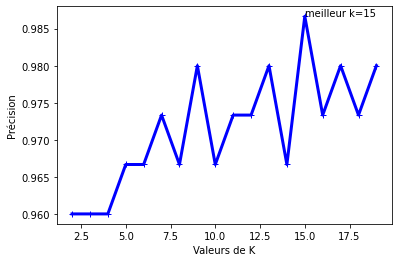

In [ ]:
fig, ax = plt.subplots()

ax.plot(x,y, "b-+", linewidth=3)
plt.ylabel('Précision')
plt.xlabel('Valeurs de K')


ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
ax.annotate("meilleur k="+str(xmax), xy=(xmax, ymax))
meilleurK = xmax
plt.show()

In [ ]:
print(f"Le meilleur k est {meilleurK} avec une précision de {round(ymax,2)}")


Le meilleur k est 15 avec une précision de 0.99


### Prédiction de l'entrée
A ce stade, le meilleur entier k a été choisie est donc la prédiction est optimale

In [ ]:
uneIris = [5.30,230,50,10.2]
cla, pourc = prediction_Class(uneIris,Data,meilleurK)
print(f"L'iris d'attribut {uneIris} est une '{cla}' (comme {int(round(pourc,0))}% de ses {meilleurK} plus proche voisins)")

[(230.45843443015923, 117), (230.5241852821521, 131), (230.75326649908988, 109), (230.9627892107298, 15), (231.04276660393415, 136), (231.0609876201519, 100), (231.08427034309366, 148), (231.1203798889228, 144), (231.13405201311207, 124), (231.18745640713297, 33), (231.18760779938012, 143), (231.18912171639911, 125), (231.22651232071118, 120), (231.2649130326518, 105), (231.26841548296215, 32), (231.28393805018106, 85), (231.30056203995704, 115), (231.33908013995386, 140), (231.34377017762978, 56), (231.3502323318479, 110), (231.3533660874637, 135), (231.37767826650867, 137), (231.38915272760735, 139), (231.39286938019504, 102), (231.4045807671058, 104), (231.40905340975752, 5), (231.41348275327434, 70), (231.42534433376133, 14), (231.4274400325078, 107), (231.43078879008297, 129), (231.44025146892665, 141), (231.44703497776763, 122), (231.45336463313728, 50), (231.4651809668141, 44), (231.46729790620532, 112), (231.47624068141423, 116), (231.4851831111443, 51), (231.49287246047123, 16

# Apprentissage non-supervisée - DBSCAN